## 数据读取

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dmp_id：营销策略编号（源数据文档未作说明，这里根据数据情况设定为1：对照组，2：营销策略一，3：营销策略二）  
user_id：支付宝用户ID  
label：用户当天是否点击活动广告（0：未点击，1：点击）

In [3]:
data = pd.read_csv('data/effect_tb.csv')
data.columns = ["dt","user_id","label","dmp_id"]
data.head()

,dt,user_id,label,dmp_id
0,1,1000004,0,1
1,1,1000004,0,2
2,1,1000006,0,1
3,1,1000006,0,3
4,1,1000007,0,1


In [6]:
data.drop(['dt'],axis=1,inplace=True)
data.shape

(2645957, 3)

## 删除重复行

In [7]:
data.drop_duplicates(inplace=True)
data.shape

(2632974, 3)

## 查看是否有缺失值

In [9]:
data.isnull().sum()

user_id    0
label      0
dmp_id     0
dtype: int64

## 确定样本量

In [11]:
data[data.dmp_id == 1].label.mean()

0.012551019015964006

In [13]:
data.dmp_id.value_counts()

1    1905662
2     411107
3     316205
Name: dmp_id, dtype: int64

## 不同策略的广告点击率

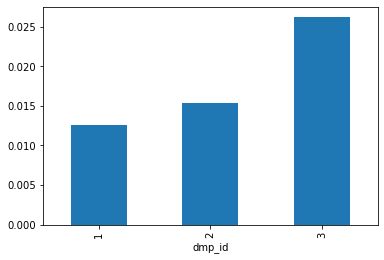

In [15]:
data.groupby(['dmp_id'])['label'].mean().plot(kind='bar')

## 假设检验

In [18]:
n_control = data[data.dmp_id==1].shape[0]
n_test = data[data.dmp_id==3].shape[0]

c_control = data[(data.dmp_id==1) & (data.label==1)].shape[0]
c_test = data[(data.dmp_id==3) & (data.label==1)].shape[0]

r_control = c_control/n_control
r_test = c_test/n_test

In [20]:
from statsmodels.stats.proportion import proportions_ztest

z_score,p = proportions_ztest([c_control,c_test],[n_control,n_test])

print("检验统计量z：",z_score,"，p值：", p)

检验统计量z： -59.44164223047762 ，p值： 0.0
